<a href="https://colab.research.google.com/github/amirsheffer/Agro-tech-project/blob/main/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 1

first download the training and validation data - 
you can just download it manually from the link, or use wget:

In [1]:
!wget https://www.dropbox.com/s/xonga1ifrt5ji05/galaxy_train.h5

--2023-05-21 06:54:59--  https://www.dropbox.com/s/xonga1ifrt5ji05/galaxy_train.h5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xonga1ifrt5ji05/galaxy_train.h5 [following]
--2023-05-21 06:55:00--  https://www.dropbox.com/s/raw/xonga1ifrt5ji05/galaxy_train.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc200bf7440803e7a0416a9194d2.dl-eu.dropboxusercontent.com/cd/0/inline/B8eLNOgXCNBw9YsKgWKCh98DxtYxLU4qRvPRYSFsMHykArbI6SnieHTQpyufxniGSRGKzoGB7Ruhgb3PuZEjdzhx7DgE3oaWhGcAEIBD95mxgPHNCv5xKe3NIs7A7LLytLEvwjphMwX3tA1AWp7idn8SzAtux83HpXMMZ5le4v2m0g/file# [following]
--2023-05-21 06:55:00--  https://uc200bf7440803e7a0416a9194d2.dl-eu.dropboxusercontent.com/cd/0/inline/B8eLNOgXCNBw9YsKgWKCh98DxtYxLU4qRvPRYSFsMHykArbI6SnieHTQpyufxn

In [2]:
!wget https://www.dropbox.com/s/syca044hglqvd5r/galaxy_val.h5

--2023-05-21 06:55:37--  https://www.dropbox.com/s/syca044hglqvd5r/galaxy_val.h5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/syca044hglqvd5r/galaxy_val.h5 [following]
--2023-05-21 06:55:37--  https://www.dropbox.com/s/raw/syca044hglqvd5r/galaxy_val.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9b4fe42c795532b0989c0b031b.dl-eu.dropboxusercontent.com/cd/0/inline/B8ePqeIfE9rdRz2ldYddsmLDNhw6kXiw8rO-ZZZ4EfwkFZlW90rf9mbfz2HH8Jnk869jO9WqNIyEkJZav7pJGfyuXob8ApJmQFB8-KTtUVO0HtskWRTIWYsS8mfHd4yTyX6FrmRBy6DDORDSJuQFkx-LLfsgL8qy8aLQnmwwGnC18A/file# [following]
--2023-05-21 06:55:38--  https://uc9b4fe42c795532b0989c0b031b.dl-eu.dropboxusercontent.com/cd/0/inline/B8ePqeIfE9rdRz2ldYddsmLDNhw6kXiw8rO-ZZZ4EfwkFZlW90rf9mbfz2HH8Jnk869j

in this homework you will build a classifier for the galaxy10 dataset (https://astronn.readthedocs.io/en/latest/galaxy10.html)

but its a "special" version of the dataset created for this homework. The images have been converted to grayscale, downsampled to 64x64, and split into "train" and "val" datasets. There is a seperate test dataset in a secret location, you will train a model, submit it, and we will evaluate it on the test dataset

![image.png](attachment:image.png)

In [3]:
path_to_training_data = 'galaxy_train.h5'
path_to_validation_data = 'galaxy_val.h5'

### activate autoreload so any changes you make to dataloader.py, model.py are automatically imported

In [4]:
%load_ext autoreload
%autoreload 2

## now, write a custom dataloader for the dataset 



In [5]:
from dataset import CustomDataset

## you should get something that works like this:

In [6]:
training_ds = CustomDataset(path_to_training_data,-1)
validation_ds = CustomDataset(path_to_validation_data,-1)

In [7]:
some_random_idx = 12
training_ds[some_random_idx]

(tensor([26.6275, 34.4300, 34.5769,  ..., 38.4556, 30.7125, 38.0475]),
 tensor(9))

## now create the data loaders, and set the batch size. 
remember to shuffle the training dataset

In [8]:
from torch.utils.data import DataLoader

training_dataloader = DataLoader(training_ds,batch_size=300,shuffle=True)
valid_dataloader = DataLoader(validation_ds,batch_size=300)

In [9]:
for x,y in training_dataloader:
    print(x.shape,y.shape)
    break

torch.Size([300, 4096]) torch.Size([300])


In [10]:
len(training_ds)

14187

In [11]:
print(y)

tensor([2, 7, 3, 9, 8, 7, 3, 7, 1, 1, 5, 2, 7, 2, 8, 7, 6, 5, 9, 0, 5, 5, 2, 5,
        7, 2, 3, 6, 7, 3, 1, 2, 7, 4, 7, 6, 5, 8, 2, 5, 7, 5, 2, 9, 2, 4, 5, 7,
        6, 8, 2, 6, 2, 6, 3, 1, 3, 9, 5, 9, 1, 2, 9, 5, 2, 6, 3, 3, 0, 2, 5, 2,
        9, 6, 2, 3, 5, 8, 3, 2, 6, 7, 2, 7, 2, 6, 9, 8, 0, 2, 2, 7, 7, 9, 0, 5,
        9, 8, 3, 7, 3, 3, 2, 5, 8, 4, 5, 8, 2, 1, 5, 3, 5, 8, 6, 8, 7, 9, 7, 7,
        2, 3, 2, 0, 9, 6, 7, 0, 8, 6, 3, 5, 2, 8, 2, 2, 6, 1, 8, 1, 1, 1, 2, 5,
        1, 3, 2, 8, 5, 4, 7, 0, 6, 5, 2, 7, 1, 9, 0, 3, 2, 9, 5, 3, 2, 7, 3, 9,
        7, 3, 2, 3, 7, 8, 7, 9, 1, 6, 1, 7, 9, 2, 6, 2, 9, 7, 7, 6, 7, 5, 1, 8,
        9, 0, 8, 2, 2, 8, 9, 9, 8, 3, 2, 6, 5, 3, 3, 8, 6, 7, 1, 5, 9, 5, 9, 9,
        9, 2, 2, 3, 7, 7, 4, 7, 4, 3, 1, 7, 1, 1, 3, 9, 7, 1, 2, 7, 8, 3, 1, 6,
        9, 5, 8, 7, 1, 9, 2, 1, 2, 8, 5, 8, 7, 7, 7, 6, 8, 7, 6, 9, 8, 6, 8, 3,
        2, 1, 2, 8, 1, 7, 6, 6, 5, 9, 5, 5, 7, 8, 8, 4, 1, 5, 9, 4, 6, 2, 2, 1,
        0, 3, 1, 0, 3, 7, 1, 7, 2, 5, 3,

## lets plot some examples from each class

this should work if your dataloader is implemented properly

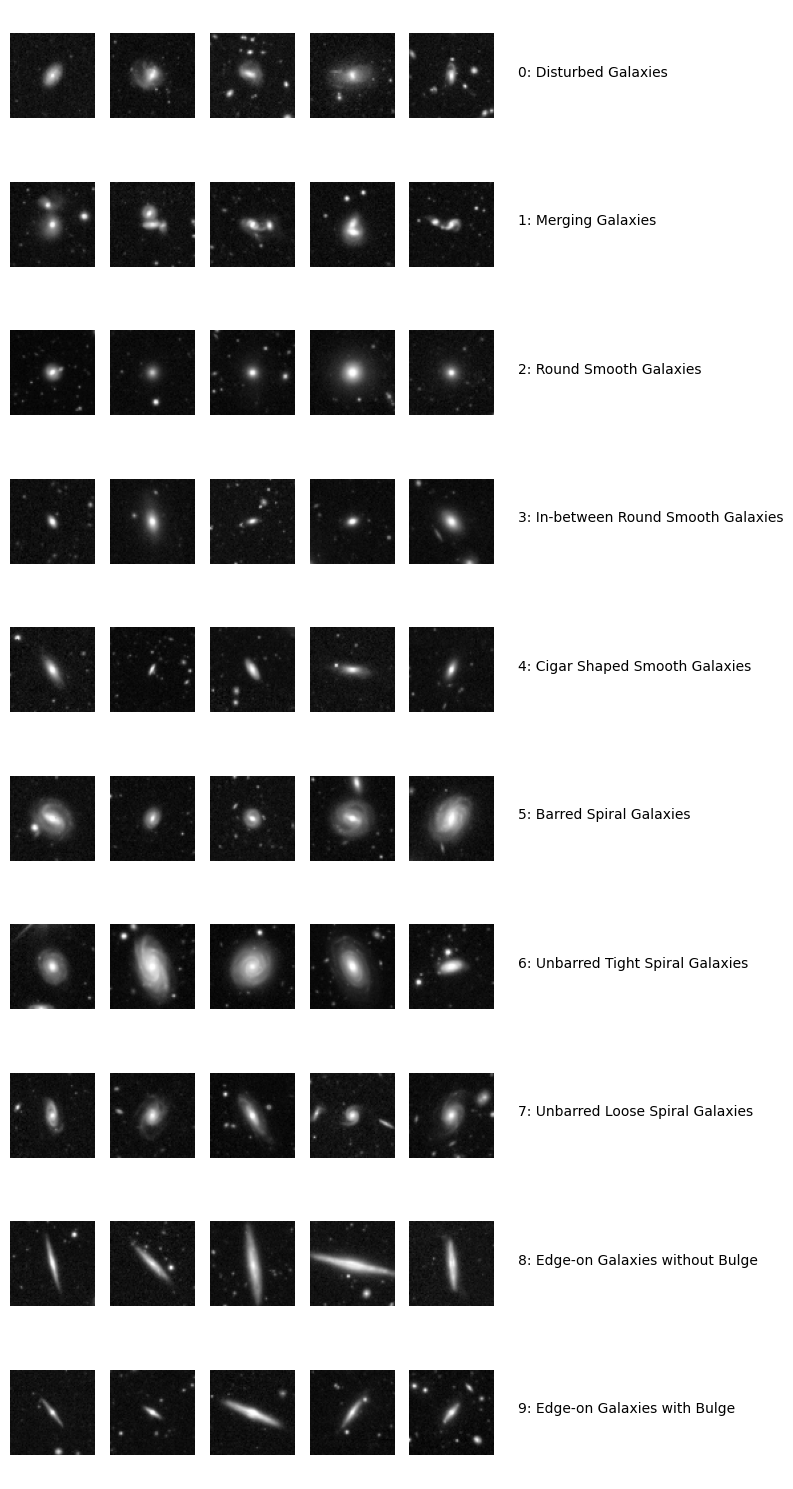

In [12]:
import numpy as np
import matplotlib.pyplot as plt

labels = [
    'Disturbed Galaxies',
    'Merging Galaxies',
    'Round Smooth Galaxies',
    'In-between Round Smooth Galaxies',
    'Cigar Shaped Smooth Galaxies',
    'Barred Spiral Galaxies',
    'Unbarred Tight Spiral Galaxies',
    'Unbarred Loose Spiral Galaxies',
    'Edge-on Galaxies without Bulge',
    'Edge-on Galaxies with Bulge'
    ]

fig,ax = plt.subplots(10,6,figsize=(8,15))


for class_i in range(10):
    idxs = np.where( training_ds.labels == class_i )[0]
    idxs = np.random.permutation(idxs)
    for plot_i in range(np.min([5,len(idxs)])):

        ax[class_i][plot_i].imshow(training_ds[idxs[plot_i]][0].reshape(64,64),cmap='gray')
        ax[class_i][plot_i].set_axis_off()

    #Draw the label
    ax[class_i][5].text(0.1,0.5,f'{class_i}: {labels[class_i]}')
    ax[class_i][5].set_axis_off()
        
plt.tight_layout()
plt.show()

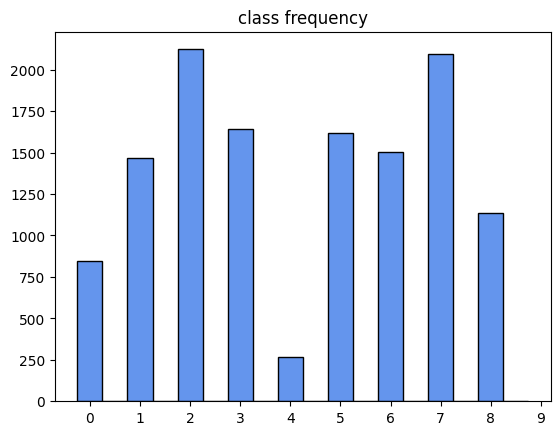

In [13]:
plt.hist(training_ds.labels.data.numpy(),bins=np.linspace(0,9,19)-0.25,color='cornflowerblue',ec='k')
plt.xticks(np.arange(10))
plt.title('class frequency')
plt.show()

# Now lets build the neural network

its a classifier - it takes as input 64*64 numbers, and outputs 10 numbers

In [14]:
from model import Net

In [15]:
net = Net()

## check your model takes the input and returns the right shape for the output.
should be (Batch size, 10) for the 10 classes

In [16]:
for x,y in training_dataloader:
    print(x.shape,net(x).shape,y.shape)
    break

torch.Size([300, 4096]) torch.Size([300, 10]) torch.Size([300])


## the training:


The network will be trained to predict a high value for output nodes that correspond to probable classes for the given example. The correct answer is, of course, only a single class. To compare the predicted values for each class and the correct class, we use a very popular loss function called CrossEntropy. It first transforms the network prediction into a set of probabilities for each class and then calculates a distance between predicted and target distributions using logarithmic values of the probabilities for each class.

To learn more check out these descriptions:
- https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim


loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) 

In [18]:
def compute_accuracy_and_loss(dataloader,net):
    total = 0
    correct = 0
    
    loss = 0
    
    if torch.cuda.is_available():
        net.cuda()
    net.eval()
    
    n_batches = 0
    with torch.no_grad():
        for x,y in dataloader:
            n_batches+=1
            
            if torch.cuda.is_available():
                x = x.cuda()
                y = y.cuda()
            pred = net(x)

            print(pred[0])
            
            loss+= loss_func(pred,y).item()
            
            pred = torch.argmax(pred,dim=1)

            correct+=len(torch.where(pred==y)[0])
            total+=len(y)

    loss = loss/n_batches      
    return correct/total, loss

In [19]:
compute_accuracy_and_loss(training_dataloader,net)

tensor([-0.2849, -0.6033, -0.9377, -0.0558, -0.0058, -0.0754, -0.6250, -0.9059,
        -1.0248,  0.0383])
tensor([-0.5557, -0.8983, -1.2898, -0.2089, -0.9958, -0.4560, -0.8869, -0.7004,
        -0.5329,  0.0923])
tensor([-0.6169, -0.7837, -1.0048,  0.2278, -0.5384, -0.1282, -1.0463, -1.1376,
        -1.2920,  0.0700])
tensor([-0.4031, -0.6548, -0.9390, -0.0720, -0.1005, -0.1106, -0.6613, -0.9108,
        -1.1055,  0.1725])
tensor([-0.2890, -0.3647, -1.1180, -0.0955, -0.2326, -0.2041, -0.5942, -0.7286,
        -1.1419,  0.3628])
tensor([-0.2476, -0.7690, -0.9451, -0.0342, -0.0432,  0.0320, -0.5625, -0.8317,
        -1.1889,  0.0478])
tensor([-0.0788, -0.7038, -1.0087, -0.1220, -0.0813,  0.1968, -0.6820, -0.5765,
        -1.0658,  0.2111])
tensor([-0.4950, -0.7075, -0.8796, -0.0743, -0.4520, -0.1974, -0.6700, -0.7552,
        -0.9915,  0.1476])
tensor([-0.4004, -0.7048, -0.9630, -0.0794, -0.1100, -0.0452, -0.6563, -0.7893,
        -0.9148,  0.0148])
tensor([-0.4054, -0.7662, -0.9900, -0

(0.09910481426658208, 2.4431013067563376)

In [20]:
compute_accuracy_and_loss(valid_dataloader,net)

tensor([-0.2465, -0.5467, -0.7603,  0.0707, -0.3341,  0.0505, -0.5640, -0.4785,
        -0.9315, -0.0811])
tensor([-0.3605, -0.3855, -1.0995, -0.2428, -0.2207, -0.1002, -0.4119, -0.4117,
        -0.6974,  0.1238])
tensor([-0.3042, -0.4036, -1.0863, -0.1708, -0.2455, -0.0788, -0.3507, -0.5898,
        -0.9264, -0.0518])
tensor([-0.3530, -0.7155, -0.9226, -0.0979, -0.0060, -0.0355, -0.5814, -0.8159,
        -0.9556,  0.0071])
tensor([-0.0096, -1.2683, -2.5828, -0.3008, -0.2274, -0.1304, -1.2330, -1.1502,
        -2.6156,  0.2441])
tensor([-0.3983, -0.8150, -1.8178, -0.0328, -0.7763, -0.2346, -0.2719, -0.5561,
        -1.3414, -0.0948])


(0.10496613995485328, 2.4380482832590737)

### A basic training loop

In [21]:
if torch.cuda.is_available():
    net.cuda()

In [22]:
from tqdm.notebook import tqdm

n_epochs = 80


training_loss_vs_epoch = []
validation_loss_vs_epoch = []

training_acc_vs_epoch = []
validation_acc_vs_epoch = []

pbar = tqdm( range(n_epochs) )

for epoch in pbar:
    
    if len(validation_loss_vs_epoch) > 1:
        pbar.set_description('val acc:'+'{0:.5f}'.format(validation_acc_vs_epoch[-1])+
                             ', train acc:'+'{0:.5f}'.format(training_acc_vs_epoch[-1]))
    
    net.train() # put the net into "training mode"
    for x,y in training_dataloader:
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()

        optimizer.zero_grad()
        pred = net(x)
        loss = loss_func(pred,y)
        loss.backward()
        optimizer.step()
    
    net.eval() #put the net into evaluation mode
    
    #evaluate accuracy and loss after this step and save for later
    train_acc, train_loss = compute_accuracy_and_loss(training_dataloader,net)
    valid_acc, valid_loss =  compute_accuracy_and_loss(valid_dataloader,net)
         
    training_loss_vs_epoch.append( train_loss)    
    training_acc_vs_epoch.append( train_acc )
    validation_loss_vs_epoch.append(valid_loss)
    validation_acc_vs_epoch.append(valid_acc)
    
    #save the model if the validation loss has decreased
    if len(validation_loss_vs_epoch)==1 or validation_loss_vs_epoch[-1] < validation_loss_vs_epoch[-2]:
        torch.save(net.state_dict(), 'trained_model.pt')
    
    
    

  0%|          | 0/80 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
tensor([ -0.6632,  -0.3344, -10.0937,  -3.6247,   1.6431,  -2.8924,  -4.6001,
         -1.9171,  -1.5929,   5.6691])
tensor([ 1.1356, -1.2847, -1.9549, -5.0771, -9.4374,  2.2353,  1.4660,  2.4755,
        -7.9136, -4.4430])
tensor([  0.9298,  -0.0521,   1.0484,   1.1824,  -7.1096,  -0.5204,  -1.6488,
          0.8503, -16.6663,  -4.2875])
tensor([  0.8542,  -0.4594,  -9.8975,   1.8568,   2.1978,  -1.0539,  -1.5915,
         -0.0903, -11.0195,   1.5657])
tensor([ 1.1635, -1.1852, -1.2329, -5.4007, -8.4767,  1.7973,  1.9094,  2.2284,
        -6.6176, -3.8935])
tensor([ 0.3889,  0.2974, -6.1866,  0.8381, -0.2735, -0.0637, -1.6615,  1.0340,
        -8.0117, -0.1931])
tensor([ 0.1664, -1.5002, -1.7845, -3.1930, -9.4702,  3.6093,  2.8120,  2.4291,
        -9.5451, -4.3581])
tensor([  0.7337,   1.9271, -10.5388,  -8.1234,  -1.1673,  -0.0630,  -1.6326,
          0.6111,   6.0395,   3.3530])
tensor([ 0.2303, -0.5290, -0.1157, -2.0671, -8.8638, 

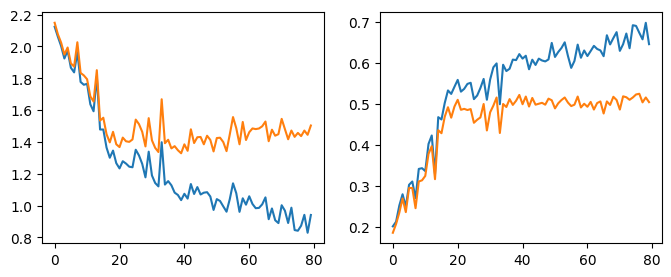

In [23]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(training_loss_vs_epoch,label='training')
ax[0].plot(validation_loss_vs_epoch,label='validation')

ax[1].plot(training_acc_vs_epoch)
ax[1].plot(validation_acc_vs_epoch)

plt.show()